<h1><center> Lyric Classification</center></h1>

Uma empresa possui um grande acervo musical, no entanto, tem muita dificuldade em diferenciar seus diferentes gêneros musicais.

O objetivo é classificar a letra de uma música utilizando somente sua letra. 

O conjunto de dados está na pasta "data" possue 4 estilos musicais

1. Bossa Nova
2. Funk
3. Gospel
4. Sertanejo

### Importação dos pacotes: 

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import re
import string
import numpy as np

from nltk.tokenize import TweetTokenizer   
from tqdm import tqdm

### Carregamento dos Dados:

In [2]:
bossa_nova_df = pd.read_csv("data/bossa_nova.csv")
funk_df = pd.read_csv("data/funk.csv")
gospel_df = pd.read_csv("data/gospel.csv")
sertanejo_df = pd.read_csv("data/sertanejo.csv")
sertanejo_df

,lyric
0,\nSer feliz pra mim não custa caro\nSe você t...
1,"\nMãe, hoje eu descobri que eu cresci\nÉ que ..."
2,\nAí você escolhe a melhor roupa\nAí você arr...
3,"\nOi, tudo bem?\nQue bom te ver\nA gente fico..."
4,\nSó vim me desculpar\nEu não vou demorar\nNã...
...,...
795,\nA luta chegou de repente\nE te colocou fren...
796,\nPara de mentir pra você mesmo\nSeu amor por...
797,\nQuadros nunca esquecem e sempre contarão\nO...
798,\nVoltei era de madrugada e me assustei\nAs l...


Vendo o formato em que estão as letras das músicas:

In [3]:
bossa_nova_df["lyric"][0]

' \nEu sei que vou te amar\nPor toda a minha vida eu vou te amar\nEm cada despedida eu vou te amar\nDesesperadamente, eu sei que vou te amar\nE cada verso meu será\nPra te dizer que eu sei que vou te amar\nPor toda minha vida\nEu sei que vou chorar\nA cada ausência tua eu vou chorar\nMas cada volta tua há de apagar\nO que esta ausência tua me causou\nEu sei que vou sofrer a eterna desventura de viver\nA espera de viver ao lado teu\nPor toda a minha vida '

### As classes estão balanceadas, como pode ser visto pelo gráfico abaixo: 

<AxesSubplot: title={'center': 'Contagem de Músicas por Gênero'}>

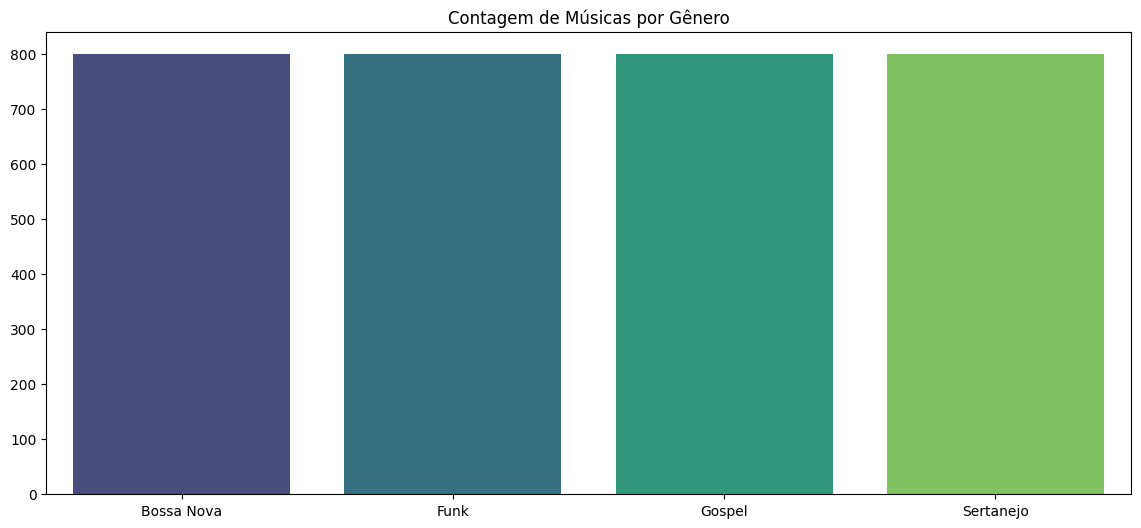

In [4]:
song_count = pd.DataFrame({"Bossa Nova":[len(bossa_nova_df)], "Funk":[len(funk_df)], "Gospel":[len(gospel_df)], "Sertanejo":[len(sertanejo_df)]})
plt.figure(figsize=(14,6))
plt.title("Contagem de Músicas por Gênero")
sns.barplot(data=song_count,palette="viridis")

Contém músicas em inglês, como essa do gênero "Bossa Nova":

In [5]:
bossa_nova_df["lyric"][len(bossa_nova_df)-1]

" \nIn my loneliness \nWhen you're gone and I'm all by muself \nAnd I need your caress \nI just think of you \nAnd the thought of you holding me near \nMakes my loneliness soon disappear \nThough you're far away \nI have only to close my eyes \nAnd you are back to stay \nI just close my eyes \nAnd the sadness that missing you brings \nSoon is gone and this heart of mine sings \nYes I love you so \nAnd that for me is all I need to know \nI will wait for you \nTil the sun falls from out of the sky \nFor what else can I do \nI will wait for you meditating \nHow sweet life will be \nWhen you come back to me "

### Contagem de palavras em cada gênero:

In [6]:
avg_word_df = pd.DataFrame(columns=["genre", "avg_word_count"])
avg_word_df

,genre,avg_word_count


In [7]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

In [74]:
all_tokens_bossa = [tokenizer.tokenize(lyric) for lyric in bossa_nova_df["lyric"].values]
all_tokens_funk = [tokenizer.tokenize(lyric) for lyric in funk_df["lyric"].values]
all_tokens_gospel = [tokenizer.tokenize(lyric) for lyric in gospel_df["lyric"].values]
all_tokens_sertanejo = [tokenizer.tokenize(lyric) for lyric in sertanejo_df["lyric"].values]

In [75]:
def remove_punct(all_tokens):
    all_tokens_clean = []
    for tokens in all_tokens:
        tokens_without_pct = [str(word) for word in tokens if not str(word) in string.punctuation]
        all_tokens_clean.append(tokens_without_pct)
    return all_tokens_clean

all_tokens_bossa = remove_punct(all_tokens_bossa)
all_tokens_funk = remove_punct(all_tokens_funk)
all_tokens_sertanejo = remove_punct(all_tokens_sertanejo)
all_tokens_gospel = remove_punct(all_tokens_gospel)

In [27]:
bossa_len = [len(tokens_bossa) for tokens_bossa in all_tokens_bossa]
funk_len = [len(tokens_funk) for tokens_funk in all_tokens_funk]
gospel_len = [len(tokens_gospel) for tokens_gospel in all_tokens_gospel]
sertanejo_len = [len(tokens_sertanejo) for tokens_sertanejo in all_tokens_sertanejo]

In [16]:
from statistics import mean

In [17]:
avg_word_df = pd.concat([avg_word_df, pd.DataFrame({"genre": ["Bossa Nova"], "avg_word_count":[mean(bossa_len)]})])
avg_word_df = pd.concat([avg_word_df, pd.DataFrame({"genre": ["Funk"], "avg_word_count":[mean(funk_len)]})])
avg_word_df = pd.concat([avg_word_df, pd.DataFrame({"genre": ["Gospel"], "avg_word_count":[mean(gospel_len)]})])
avg_word_df = pd.concat([avg_word_df, pd.DataFrame({"genre": ["Sertanejo"], "avg_word_count":[mean(sertanejo_len)]})])
avg_word_df

,genre,avg_word_count
0,Bossa Nova,138.98500
0,Funk,243.85625
0,Gospel,176.26000
0,Sertanejo,175.06250


In [18]:
avg_word_df.reset_index(drop=True)

,genre,avg_word_count
0,Bossa Nova,138.98500
1,Funk,243.85625
2,Gospel,176.26000
3,Sertanejo,175.06250


Pode-se ver que Funk é o gênero com maior número de palavras em suas letras. Gospel e Sertanejo ficam bem próximos em segund. E por último, tem-se Bossa Nova. 

<AxesSubplot: title={'center': 'Contagem de número de palavras por Gênero'}, xlabel='genre', ylabel='avg_word_count'>

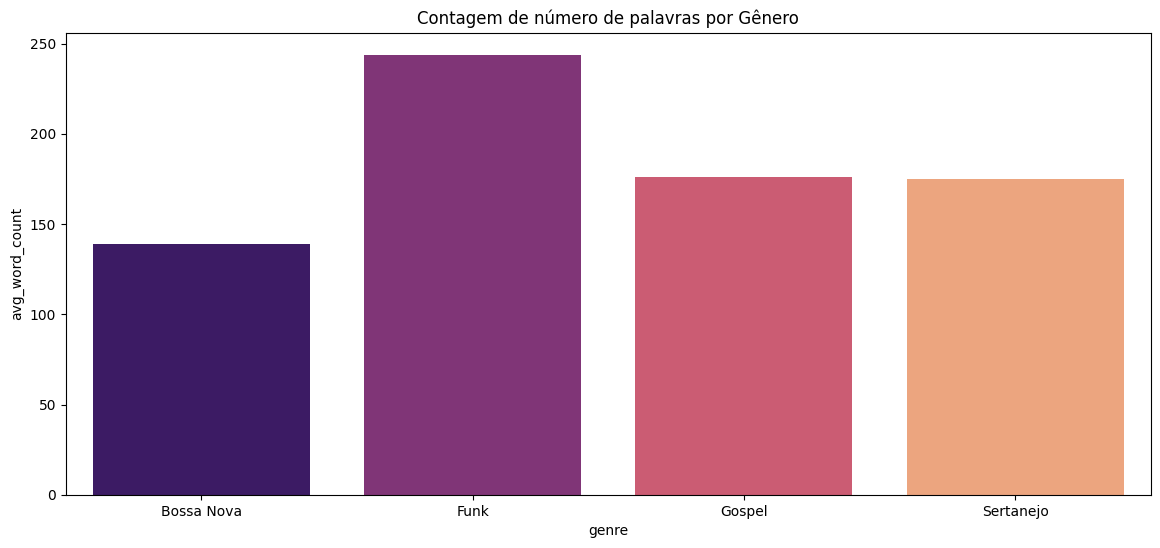

In [19]:
plt.figure(figsize=(14,6))
plt.title("Contagem de número de palavras por Gênero")
sns.barplot(data=avg_word_df, x="genre",y='avg_word_count', palette="magma")

### E palavras únicas? 

In [28]:
bossa_set_len = [len(set(tokens_bossa)) for tokens_bossa in all_tokens_bossa]
funk_set_len = [len(set(tokens_funk)) for tokens_funk in all_tokens_funk]
gospel_set_len = [len(set(tokens_gospel)) for tokens_gospel in all_tokens_gospel]
sertanejo_set_len = [len(set(tokens_sertanejo)) for tokens_sertanejo in all_tokens_sertanejo]

In [30]:
avg_word_set_df = pd.DataFrame(columns=["genre", "avg_word_count"])
avg_word_set_df

,genre,avg_word_count


In [31]:
avg_word_set_df = pd.concat([avg_word_set_df, pd.DataFrame({"genre": ["Bossa Nova"], "avg_word_count":[mean(bossa_set_len)]})])
avg_word_set_df = pd.concat([avg_word_set_df, pd.DataFrame({"genre": ["Funk"], "avg_word_count":[mean(funk_set_len)]})])
avg_word_set_df = pd.concat([avg_word_set_df, pd.DataFrame({"genre": ["Gospel"], "avg_word_count":[mean(gospel_set_len)]})])
avg_word_set_df = pd.concat([avg_word_set_df, pd.DataFrame({"genre": ["Sertanejo"], "avg_word_count":[mean(sertanejo_set_len)]})])
avg_word_set_df.reset_index(drop=True)

,genre,avg_word_count
0,Bossa Nova,70.94250
1,Funk,87.85875
2,Gospel,73.64875
3,Sertanejo,77.66375


Retirando as palavras únicas, podemos ver que a diferença entre Bossa Nova, Sertanejo e Gospel diminuiu. Porém Funk continua na liderança

<AxesSubplot: title={'center': 'Contagem de número de palavras únicas por Gênero'}, xlabel='genre', ylabel='avg_word_count'>

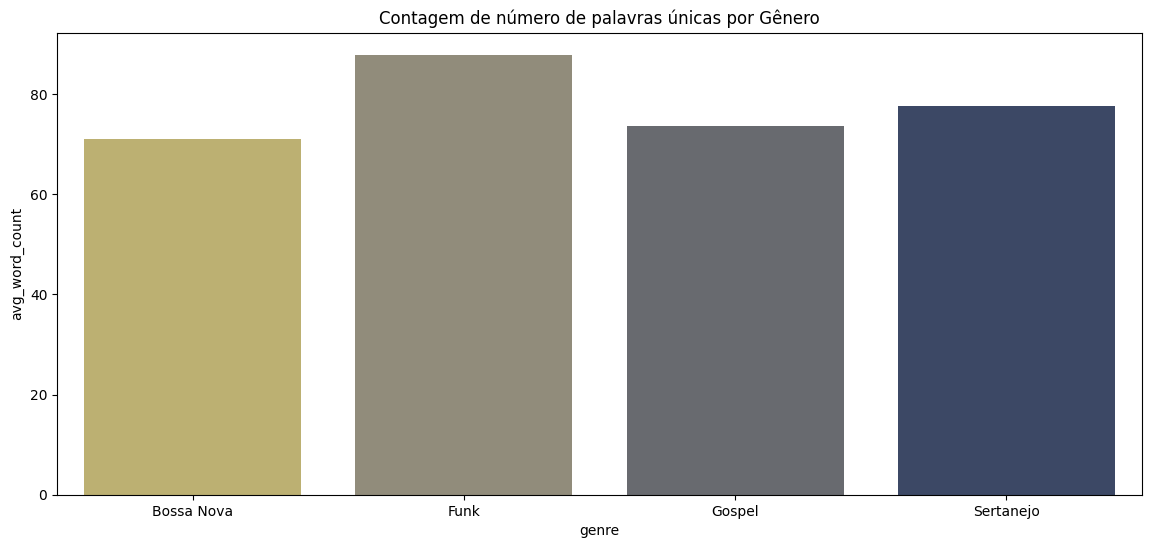

In [34]:
plt.figure(figsize=(14,6))
plt.title("Contagem de número de palavras únicas por Gênero")
sns.barplot(data=avg_word_set_df, x="genre",y='avg_word_count', palette="cividis_r")

### Contagem de termos mais repetidos por gênero

In [60]:
with codecs.open('data/stopwords.txt', encoding="utf-8") as file:
    stop_words = file.readlines()

stop_words = [word.strip() for word in stop_words]
stop_words.append("...")
stop_words.append("pra")

In [76]:
def get_word_freq(all_tokens):
    frequency = {}
    for tokens in all_tokens:
        for word in tokens:
            if word not in stop_words:
                if word in frequency:
                    frequency[word] += 1
                else:
                    frequency[word] = 1
    return frequency

freq_bossa = get_word_freq(all_tokens_bossa)
freq_funk = get_word_freq(all_tokens_funk)
freq_gospel = get_word_freq(all_tokens_gospel)
freq_sertanejo = get_word_freq(all_tokens_sertanejo)

In [77]:
def create_freq_df(freq):
    freq_df = pd.DataFrame(columns=["Word", "Count"])
    
    for key in tqdm(freq):
        freq_df = pd.concat([freq_df, pd.DataFrame({"Word":[key],"Count":[freq[key]]})])
    
    return freq_df.reset_index(drop=True)

freq_bossa_df = create_freq_df(freq_bossa)
freq_funk_df = create_freq_df(freq_funk)
freq_gospel_df = create_freq_df(freq_gospel)
freq_sertanejo_df = create_freq_df(freq_sertanejo)

100%|██████████| 7225/7225 [00:04<00:00, 1722.51it/s]


In [78]:
freq_bossa_df = freq_bossa_df.sort_values("Count", ascending=False).reset_index(drop=True)
freq_funk_df = freq_funk_df.sort_values("Count", ascending=False).reset_index(drop=True)
freq_gospel_df = freq_gospel_df.sort_values("Count", ascending=False).reset_index(drop=True)
freq_sertanejo_df = freq_sertanejo_df.sort_values("Count", ascending=False).reset_index(drop=True)

<AxesSubplot: title={'center': 'Palavras mais repetidas em músicas com o gênero Bossa Nova'}, xlabel='Word', ylabel='Count'>

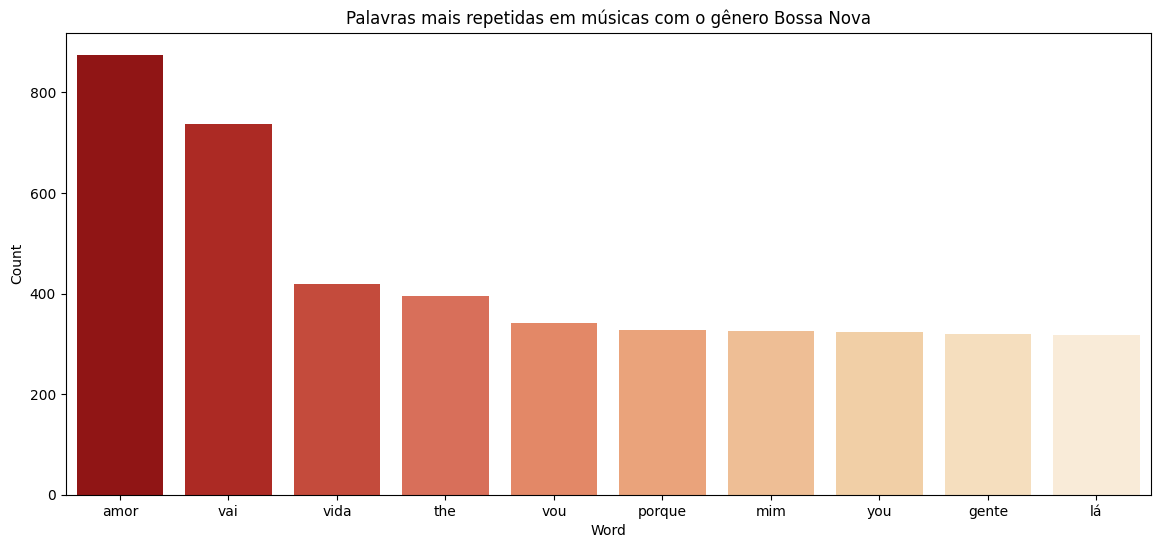

In [79]:
plt.figure(figsize=(14,6))
plt.title("Palavras mais repetidas em músicas com o gênero Bossa Nova")
sns.barplot(data=freq_bossa_df.head(10), x="Word",y="Count",palette="OrRd_r")

<AxesSubplot: title={'center': 'Palavras mais repetidas em músicas com o gênero Funk'}, xlabel='Word', ylabel='Count'>

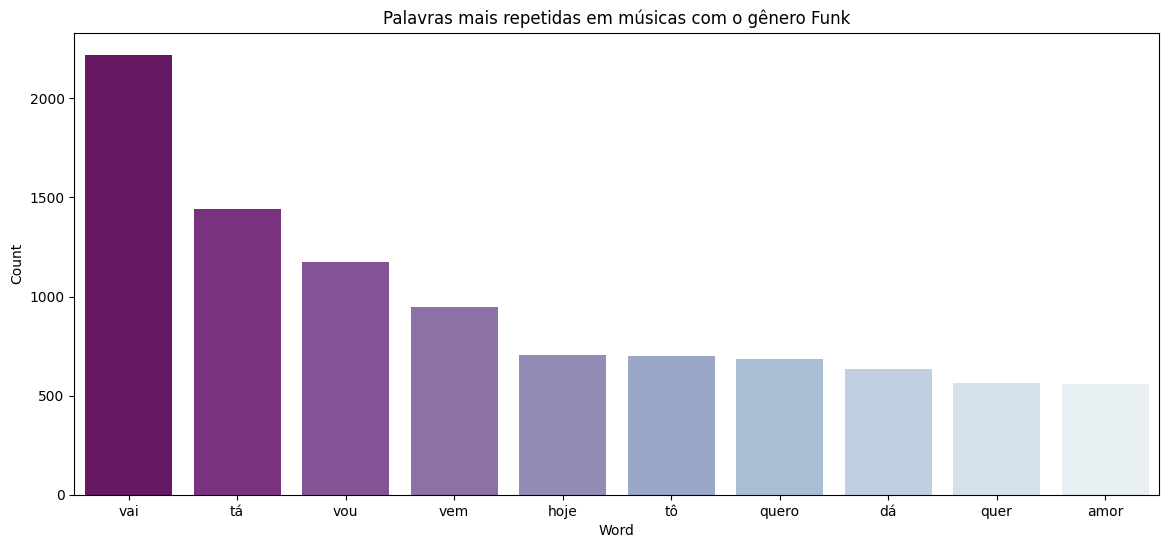

In [80]:
plt.figure(figsize=(14,6))
plt.title("Palavras mais repetidas em músicas com o gênero Funk")
sns.barplot(data=freq_funk_df.head(10), x="Word",y="Count",palette="BuPu_r")

<AxesSubplot: title={'center': 'Palavras mais repetidas em músicas com o gênero Gospel'}, xlabel='Word', ylabel='Count'>

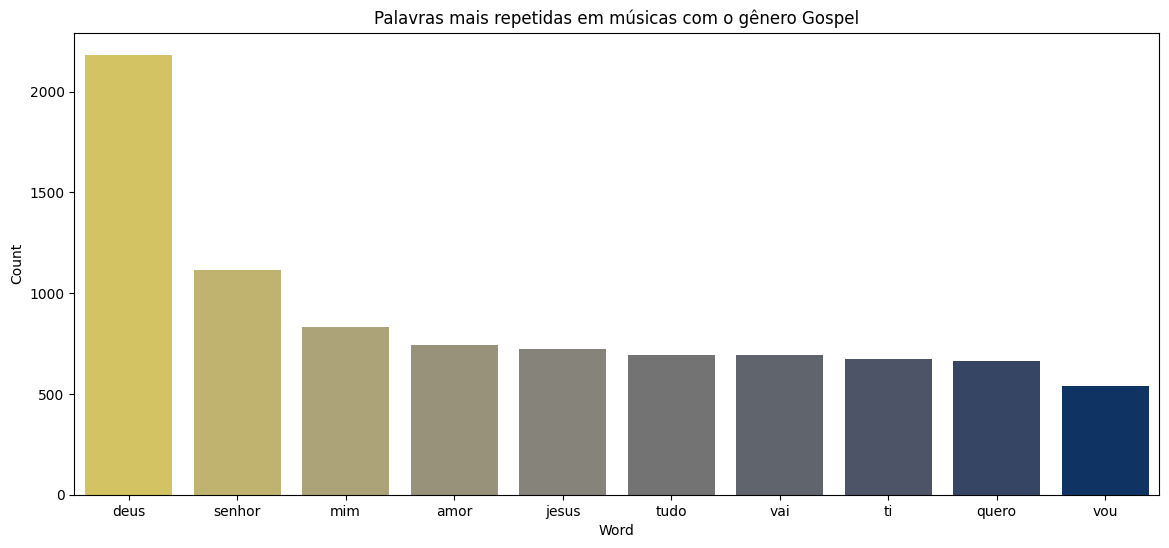

In [82]:
plt.figure(figsize=(14,6))
plt.title("Palavras mais repetidas em músicas com o gênero Gospel")
sns.barplot(data=freq_gospel_df.head(10), x="Word",y="Count",palette="cividis_r")

<AxesSubplot: title={'center': 'Palavras mais repetidas em músicas com o gênero Gospel'}, xlabel='Word', ylabel='Count'>

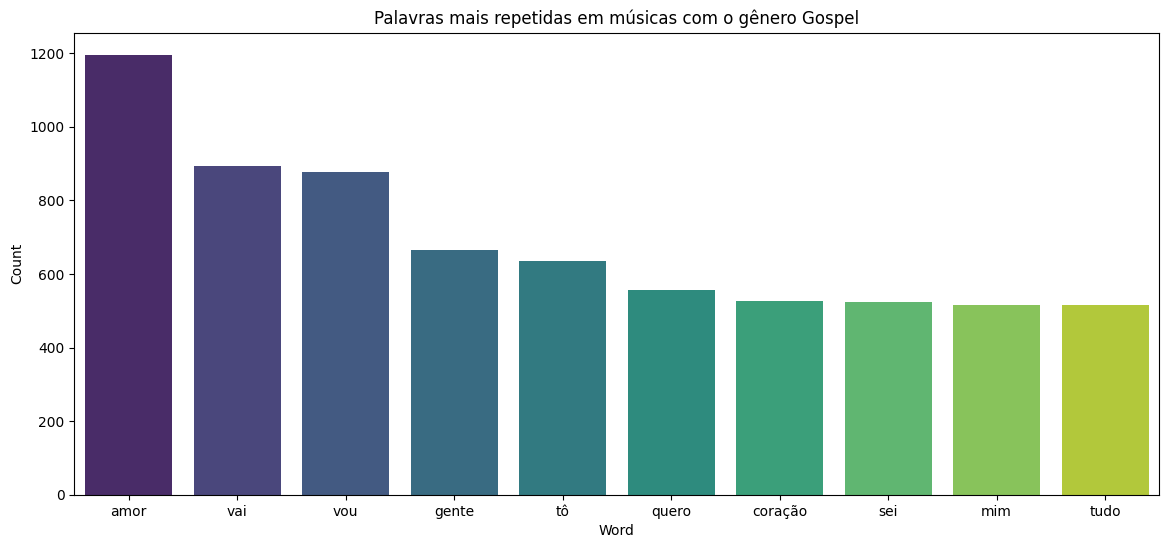

In [83]:
plt.figure(figsize=(14,6))
plt.title("Palavras mais repetidas em músicas com o gênero Gospel")
sns.barplot(data=freq_sertanejo_df.head(10), x="Word",y="Count",palette="viridis")